In [75]:
%load_ext autoreload
%autoreload 2

import sys, os
import matplotlib
import itertools
from matplotlib import animation, rc

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

from IPython.display import HTML
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
import scipy.sparse as sps
import scipy.sparse.linalg as LAS

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
def srs(x, y, M):
    # x and y should be a meshgrid.
    u = np.zeros_like(x)
    
    u = (1/2)*(x**2 - 1)

    return u

                     

In [77]:
N = 20    # The number of interval
h = 0.1  # Lenght of each interval
print("h = ", h)

# Set tolerance
tolerance = h**2 / 4.

# This means we have N+1 points -> N-1 interior points
w = np.zeros((N+2, N+2))

# Set the boundary conditions
w[:, 1]  = 0.0 # x = 0
w[:, -1] = 0.0 # x = 1, 0 <= y <= 1/2
w[-2, :] = 0.0 # y = 0
w[1, :]  = 0.0 # y = 1


for i in range(10,21):
    w[i, -1] = 0
# x = 1, 1/2 < y <= 1
# print(w)

# Create temporary buffer
wn = np.copy(w)

# Iterator
k = 0

for n in range(100):
    # Only iterate over the interior points.
    for i, j in itertools.product(range(1, N), range(1, N)):
        wn[i, j] = 0.25 * (wn[i-1, j] + w[i+1, j] + wn[i, j-1] + w[i, j+1]) + 1
        
        #Enforce BCs with Ghost
        w[:, 0] = w[:, 2] # No-Flux at x = 0
        w[-1, :] = w[-3, :] # No-Flux at y = 0
        w[0, :] = w[2, :] #No-Flux at y = 1
    
    # Compute the difference between the old and new approximation
    error = np.max(np.abs(wn - w))
        
    # Replace the former approximation
    w[1:N, 1:N] = wn[1:N, 1:N]
       
    # Increment iteration counter
    k += 1
    
    # Print progress.
    #print('k = {0:d}, error = {1:.4g}'.format(k, error))



h =  0.1


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


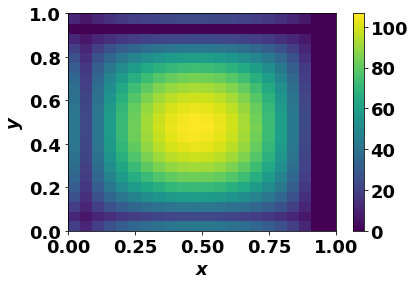

In [78]:
# Plot the solution
xx, yy = np.meshgrid(np.linspace(0, 1, N+3), np.linspace(0, 1, N+3))

# Have to reflect the w vector to match the data format that pcolor expects.
# For more information: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html
plt.pcolor(xx, yy, w)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar()

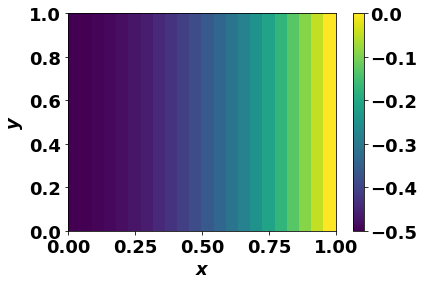

In [79]:
#Plot for u = (1/2)(x**2 - 1)
# Plot the solution
xx, yy = np.meshgrid(np.linspace(0, 1, N+2), np.linspace(0, 1, N+2))

# Create the analytical solution
u = srs(xx, yy, 20)

# Have to reflect the w vector to match the data format that pcolor expects.
# For more information: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html
xx, yy = np.meshgrid(np.linspace(0, 1, N+3), np.linspace(0, 1, N+3))

plt.pcolor(xx, yy, u)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar()

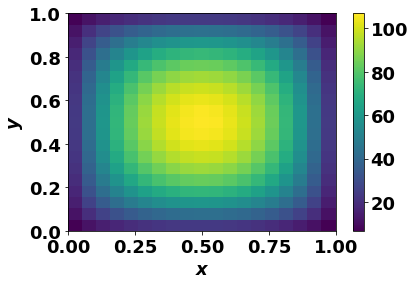

In [80]:
error = np.abs(u[1:N, 1:N] - w[1:N, 1:N])

# Plot the solution
xx, yy = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))

# Have to reflect the w vector to match the data format that pcolor expects.
# For more information: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html
plt.pcolor(xx, yy, error)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar()

In [81]:
N = 20    # The number of interval
h = 0.1  # Lenght of each interval
print("h = ", h)

# Set tolerance
tolerance = h**2 / 4.

# This means we have N+1 points -> N-1 interior points
w = np.zeros((N+2, N+2))

# Set the boundary conditions
w[:, 1]  = 0.0 # x = 0
w[:, -1] = 0.0 # x = 1, 0 <= y <= 1/2
w[-2, :] = 0.0 # y = 0
w[1, :]  = 0.0 # y = 1


for i in range(10,21):
    w[i, -1] = 0
# x = 1, 1/2 < y <= 1
# print(w)

# Create temporary buffer
wn = np.copy(w)

# Iterator
k = 0

for n in range(100):
    # Only iterate over the interior points.
    for i, j in itertools.product(range(1, N), range(1, N)):
        wn[i, j] = 0.25 * (wn[i-1, j] + w[i+1, j] + wn[i, j-1] + w[i, j+1]) -0.5
        
        #Enforce BCs with Ghost
        w[:, 0] = w[:, 2] # No-Flux at x = 0
        w[-1, :] = w[-3, :] # No-Flux at y = 0
        w[0, :] = w[2, :] #No-Flux at y = 1
    
    # Compute the difference between the old and new approximation
    error = np.max(np.abs(wn - w))
        
    # Replace the former approximation
    w[1:N, 1:N] = wn[1:N, 1:N]
       
    # Increment iteration counter
    k += 1
    
    # Print progress.
    #print('k = {0:d}, error = {1:.4g}'.format(k, error))

h =  0.1


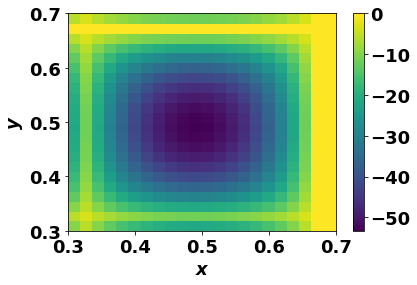

In [83]:
# Plot the solution
xx, yy = np.meshgrid(np.linspace(0.3, 0.7, N+3), np.linspace(0.3, 0.7, N+3))

# Have to reflect the w vector to match the data format that pcolor expects.
# For more information: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html
plt.pcolor(xx, yy, w)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar()